### 05 Measurement of electron beam convergence angle
This notebook demonstrates the process of electron beam convergence angle measurement. The concept is to use a defocused BSE image of the opening hole on a Faraday cage specimen to deduce the electron beam convergence angle. By analyzing the intensity profile perpendicular the blurry edge around the opening hole, the disk diameter of diverged electron beam can be estimated by measuring the width of intensity transition region. 

In practice, the defocused BSE image can be acquired by focusing the electron beam at a working distance (WD) for ECCI, e.g. 4mm in Verios, and set the sample height to a value lower than the electron beam cross-over point. It is important to optimize the image brightness and contrast such that the dynamic range is maximized without clipping.

#### Import dependent packages

In [1]:
from pathlib import Path
import os
from openECCI import optimization

#### Load a defocused BSE image of the opening hole on a Faraday cage specimen

In [2]:
%matplotlib inline

hole_img_path = Path(r'../openECCI-data/hole_image/mode1/')
hole_img_filename = r'HV20.0_curr13nA.tif'
hole_img_file = os.path.join(hole_img_path, hole_img_filename)

#### Instantiate a convergence_angle_measurement object with the defocused image as input

In [137]:
conv = optimization.convergence_angle_measurement(hole_img_file)

#### Find the centroid of the opening hole
To extract the intensity profile perpendicular to the hole opening edge, it is important to find the centroid of the hole. This can be automated using `convergence_angle_measurement.find_centroid` function once a suitable threshold is set to segment the region of hole. Depending on the bitdepth of the input image, the `threshold` value should be between 0-65535 for 16bit image, or 0-255 for 8bit image. To confirm the quality of segmentation, set `plot` to True to visualize the result. 

A good segmentation should result a clearly outlined edge of the hole (overlaid with a difference color). And the centroid should be marked as a red dot at the accurate center of the hole.

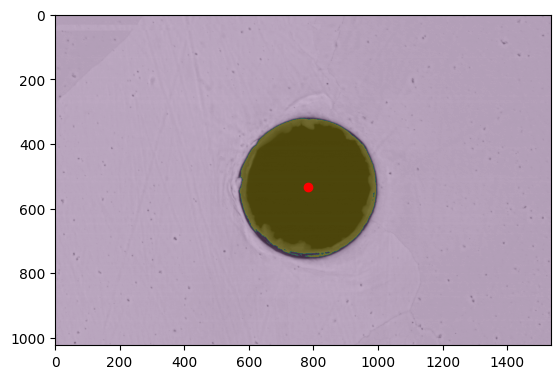

In [138]:
centroid = conv.find_centroid(threshold=20000, plot=True)

#### Test and optimize the parameters for automated extraction of edge profile
The width of the intensity transition region in the hole image can be estimated by finding the max and min value and location in the second derivative of the image intensity profile perpendicular to the hole edge. However, local noises or surface features in the image BSE image sometimes can lead to incorrectly calculated max and min value and location in the second derivative plot. Therefore, it is necessary to apply Gaussian smooth to the intensity profile to denoise before computing its gradient change.

By using the `convergence_angle_measurement.get_profile_from_angle` function, the edge intensity profile can be extracted from the centroid towards a given angle. A zero degree angle is defined as the horizontal line from the centroid to the right. The positive angle is in the counter-clockwise direction. `filter_sigma` is the value to set the magnitude of Gaussian smooth. Set `plot` to `True` verify the calculation results. It is important to find a suitable amount of Gaussian smooth without over-smoothing in this step.


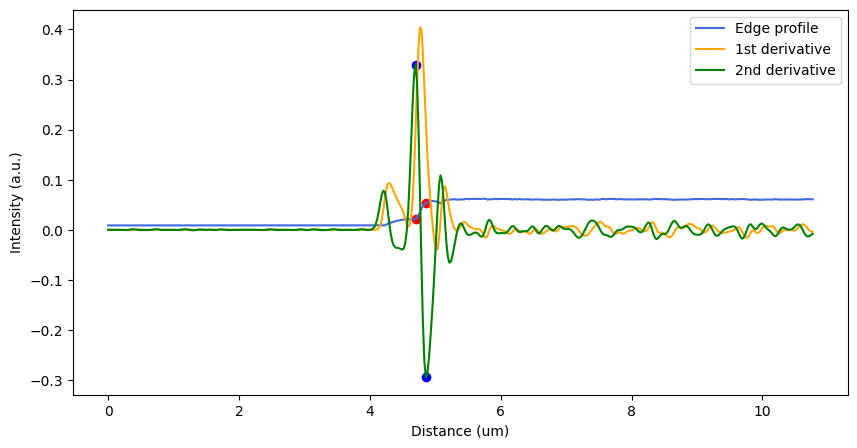

In [141]:
profile, gradient_1st, gradient_2nd = conv.get_profile_from_angle(angle=0 ,filter_sigma=2, vertical_bin=2, plot=True)

#### Perform convergence angle measurement along different angles and summarize the results
`convergence_angle_measurement.compute` is used to calculate the edge intensity profile along directions from 0-359 degrees at a user-defined step size of `angle_step`. Once an optimum sigma value for Gaussian smooth is found in the last cell, it can be used for the input `filter_sigma` in this function. Additionally, the result summary can be plotted and/or saved as a .png image.

100%|██████████| 36/36 [00:04<00:00,  8.34it/s]


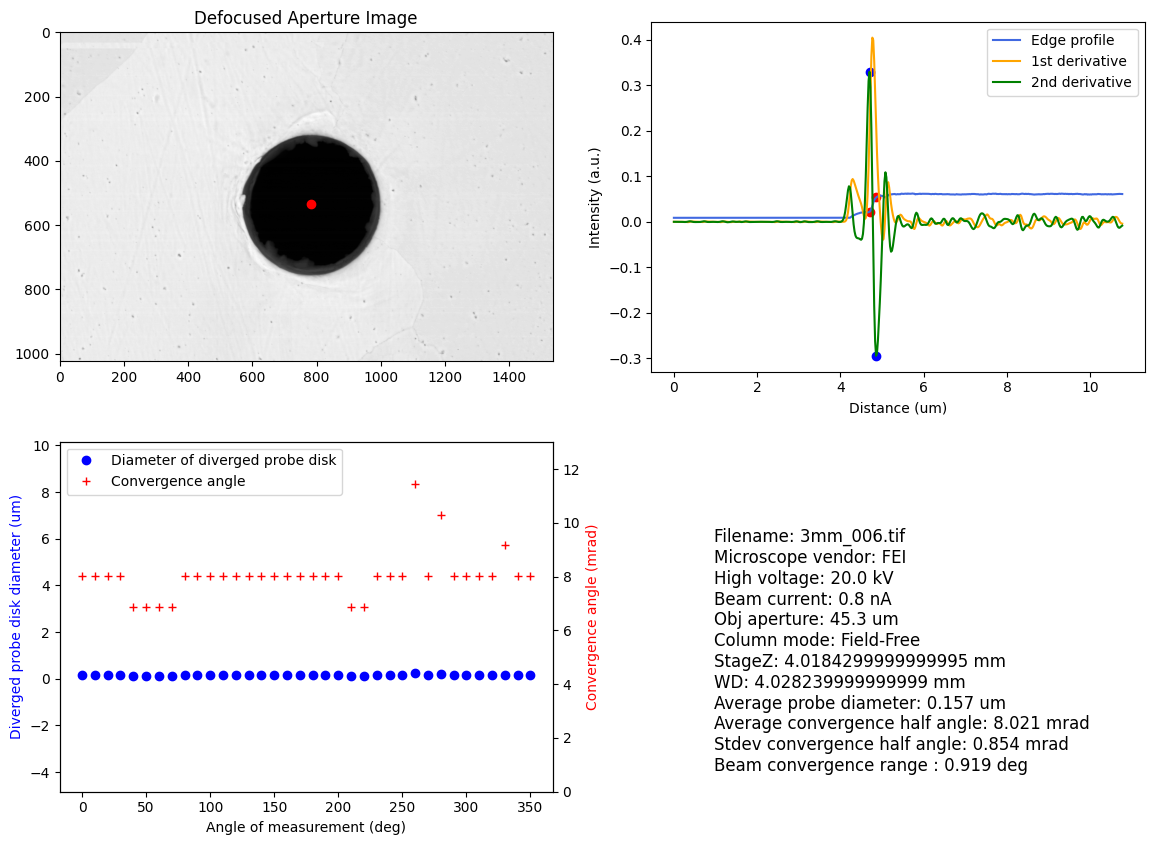

In [143]:
conv.compute(angle_step=10, filter_sigma=2, vertical_bin=2, plot=True, save_results=True)